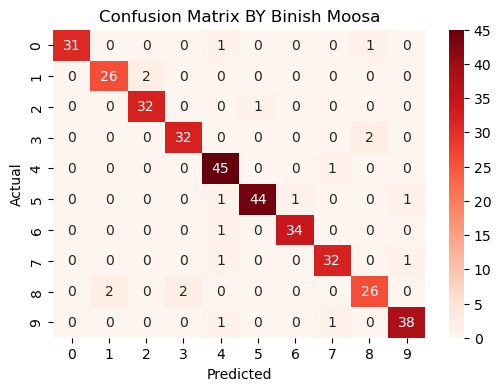

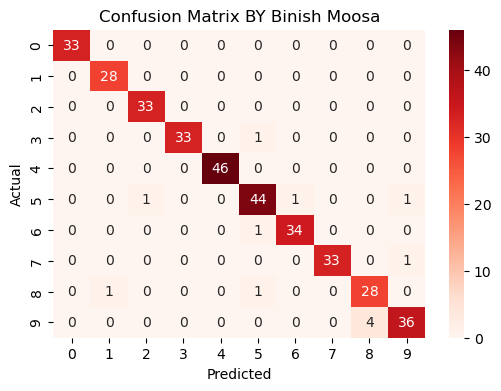

In [13]:
# Aim: Implement a Machine Learning model using
#      Bagging Classifier
# Name: Binish Moosa
# UIN: 232P001, Roll No.: 24

import tkinter as tk
from tkinter import messagebox, ttk
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def train_model():
    try:
        # Load dataset
        digits = load_digits()
        X, y = digits.data, digits.target
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Choose base estimator
        if estimator_combo.get() == "Decision Tree":
            estimator = DecisionTreeClassifier(random_state=42)
        else:
            estimator = LogisticRegression(max_iter=500, solver="liblinear")

        # Bagging model
        model = BaggingClassifier(
            estimator=estimator,
            n_estimators=int(estimator_entry.get()),
            random_state=42
        )
        model.fit(X_train, y_train)

        # Accuracy
        accuracy = model.score(X_test, y_test)
        accuracy_label.config(text=f"Model Accuracy: {accuracy:.2f}")

        # Confusion matrix
        cm = confusion_matrix(y_test, model.predict(X_test))
        fig, ax = plt.subplots(figsize=(6, 4))
        sn.heatmap(cm, annot=True, fmt="d", cmap="Reds", ax=ax)  # switched to red-pink theme
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
        ax.set_title("Confusion Matrix BY Binish Moosa")

        # Clear previous canvas
        for widget in canvas_frame.winfo_children():
            widget.destroy()

        # Embed confusion matrix in Tkinter
        canvas = FigureCanvasTkAgg(fig, master=canvas_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

    except Exception as e:
        messagebox.showerror("Error", str(e))

# GUI setup
window = tk.Tk()
window.title("Bagging Classifier - Binish Moosa 232P001")

# Light pink theme
bg_color = "#ffe6f2"   # soft light pink
btn_color = "#ff99cc"  # medium pink
btn_hover = "#ff66b2"  # darker pink
text_color = "#4a004a" # dark purple

window.config(bg=bg_color)

# Base estimator dropdown
label1 = tk.Label(window, text="Select Base Estimator:", bg=bg_color, fg=text_color, font=("Arial", 11, "bold"))
label1.pack(pady=10)

style = ttk.Style()
style.theme_use("clam")
style.configure("TCombobox", fieldbackground="white", background="white")

estimator_combo = ttk.Combobox(window, values=["Decision Tree", "Logistic Regression"])
estimator_combo.current(0)
estimator_combo.pack(pady=10)

# Number of estimators
label2 = tk.Label(window, text="Number of Estimators:", bg=bg_color, fg=text_color, font=("Arial", 11, "bold"))
label2.pack(pady=10)

estimator_entry = tk.Entry(window, bg="white", fg=text_color, justify="center", relief="solid")
estimator_entry.insert(0, "10")
estimator_entry.pack(pady=10)

# Hover effect for button
def on_enter(e):
    train_btn.config(bg=btn_hover)

def on_leave(e):
    train_btn.config(bg=btn_color)

# Train button
train_btn = tk.Button(window, text="Train Model", command=train_model, bg=btn_color, fg="white",
                      font=("Arial", 11, "bold"), relief="flat", padx=10, pady=5)
train_btn.bind("<Enter>", on_enter)
train_btn.bind("<Leave>", on_leave)
train_btn.pack(pady=15)

# Accuracy label
accuracy_label = tk.Label(window, text="Model Accuracy: N/A", bg=bg_color, fg=text_color, font=("Arial", 11))
accuracy_label.pack(pady=10)

# Frame for confusion matrix
canvas_frame = tk.Frame(window, bg=bg_color)
canvas_frame.pack(pady=20)

# Run GUI
window.mainloop()
